# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import scipy
from scipy.stats.mstats import winsorize
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [184]:
df = pd.read_csv(r"C:\Submission Machine Learning\Dataset_clustering.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1) Memahami Struktur Data**

In [185]:
# Konversi kolom tanggal menjadi Datetime
if 'TransactionDate' in df.columns:
   df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])  # Konversi ke datetime

In [186]:
# Konversi kolom tanggal menjadi Datetime
if 'PreviousTransactionDate' in df.columns:
    df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

#### **Insight**
- Mengonversi kolom tanggal dalam dataset menjadi format datetime menggunakan fungsi pd.to_datetime()

In [187]:
#Tinjau Jumlah Baris dan Kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

#### **Insight**
- Dataset memiliki 2512 baris dan 16 kolom.
- Terdapat berbagai jenis data:
  - **Numerik**: TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance
  - **Kategorikal/Objek**: TransactionID, AccountID, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation
  - **Date Time**: TransactionDate, PreviousTransactionDate

In [188]:
# Identifikasi jenis kolom
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

# Menampilkan beberapa baris pertama untuk setiap kategori kolom
print("Data Kolom Numerik:")
display(df[numeric_cols].head())

print("\nData Kolom Kategorikal:")
display(df[categorical_cols].head())

print("\nData Kolom Tanggal:")
display(df[datetime_cols].head())

Data Kolom Numerik:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40



Data Kolom Kategorikal:


,TransactionID,AccountID,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation
0,TX000001,AC00128,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor
1,TX000002,AC00455,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor
2,TX000003,AC00019,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student
3,TX000004,AC00070,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student
4,TX000005,AC00411,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student



Data Kolom Tanggal:


,TransactionDate,PreviousTransactionDate
0,2023-04-11 16:29:14,2024-11-04 08:08:08
1,2023-06-27 16:44:19,2024-11-04 08:09:35
2,2023-07-10 18:16:08,2024-11-04 08:07:04
3,2023-05-05 16:32:11,2024-11-04 08:09:06
4,2023-10-16 17:51:24,2024-11-04 08:06:39


#### **Insight**
- Mengidentifikasi jenis kolom dalam dataset berdasarkan tipe datanya

### **2) Menangani Data yang Hilang**

In [189]:
# Mengecek jumlah data yang hilang di setiap kolom
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

#### **Insight**
- Tidak ada missing values dalam dataset ini. Semua kolom memiliki jumlah data yang lengkap.

### **3) Analisis Distribusi dan Korelasi**

In [190]:
# Menampilkan statistik deskriptif dari dataset
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


#### **Insight**
- Mayoritas transaksi bernilai kecil, tetapi ada beberapa transaksi dengan nilai besar yang mempengaruhi rata-rata.
- Beberapa akun dan perangkat digunakan untuk banyak transaksi, yang bisa menunjukkan pelanggan aktif atau aktivitas mencurigakan.
- Transaksi debit lebih dominan dibandingkan metode lainnya, dengan cabang bank (Branch) sebagai saluran transaksi terbanyak.
- Kelompok usia pelanggan cukup beragam, tetapi rata-rata berusia 44 tahun, dengan mahasiswa sebagai kelompok pekerjaan paling aktif.
- Sebagian besar pelanggan memiliki saldo di bawah $5.000, tetapi ada juga pelanggan dengan saldo yang jauh lebih tinggi.
- Login sebagian besar terjadi sekali per sesi, tetapi ada yang login berkali-kali, yang bisa menjadi indikasi aktivitas tidak biasa.
- Pola transaksi menunjukkan lokasi tertentu lebih aktif, dengan Fort Worth sebagai lokasi transaksi terbanyak.

In [191]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Statistik Deskriptif Variabel Numerik:")
print(df[numeric_cols].describe())

Statistik Deskriptif Variabel Numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  AccountBalance
count        2512.000000  2512.000000          2512.000000    2512.000000     2512.000000
mean          297.593778    44.673965           119.643312       1.124602     5114.302966
std           291.946243    17.792198            69.963757       0.602662     3900.942499
min             0.260000    18.000000            10.000000       1.000000      101.250000
25%            81.885000    27.000000            63.000000       1.000000     1504.370000
50%           211.140000    45.000000           112.500000       1.000000     4735.510000
75%           414.527500    59.000000           161.000000       1.000000     7678.820000
max          1919.110000    80.000000           300.000000       5.000000    14977.990000


#### **Insight**
- Jumlah transaksi bervariasi besar – Nilai transaksi rata-rata $297, tetapi ada transaksi kecil ($0.26) hingga besar ($1,919).
- Mayoritas pelanggan berusia 44 tahun, dengan rentang usia 18 - 80 tahun.
- Durasi transaksi cukup cepat, rata-rata 119 detik, dengan beberapa transaksi berlangsung hingga 300 detik.
- Sebagian besar pelanggan login sekali, tetapi ada yang login hingga 5 kali, berpotensi anomali atau indikasi fraud.
- Saldo pelanggan sangat bervariasi, rata-rata $5,114, tetapi ada yang memiliki saldo tinggi ($14,978).

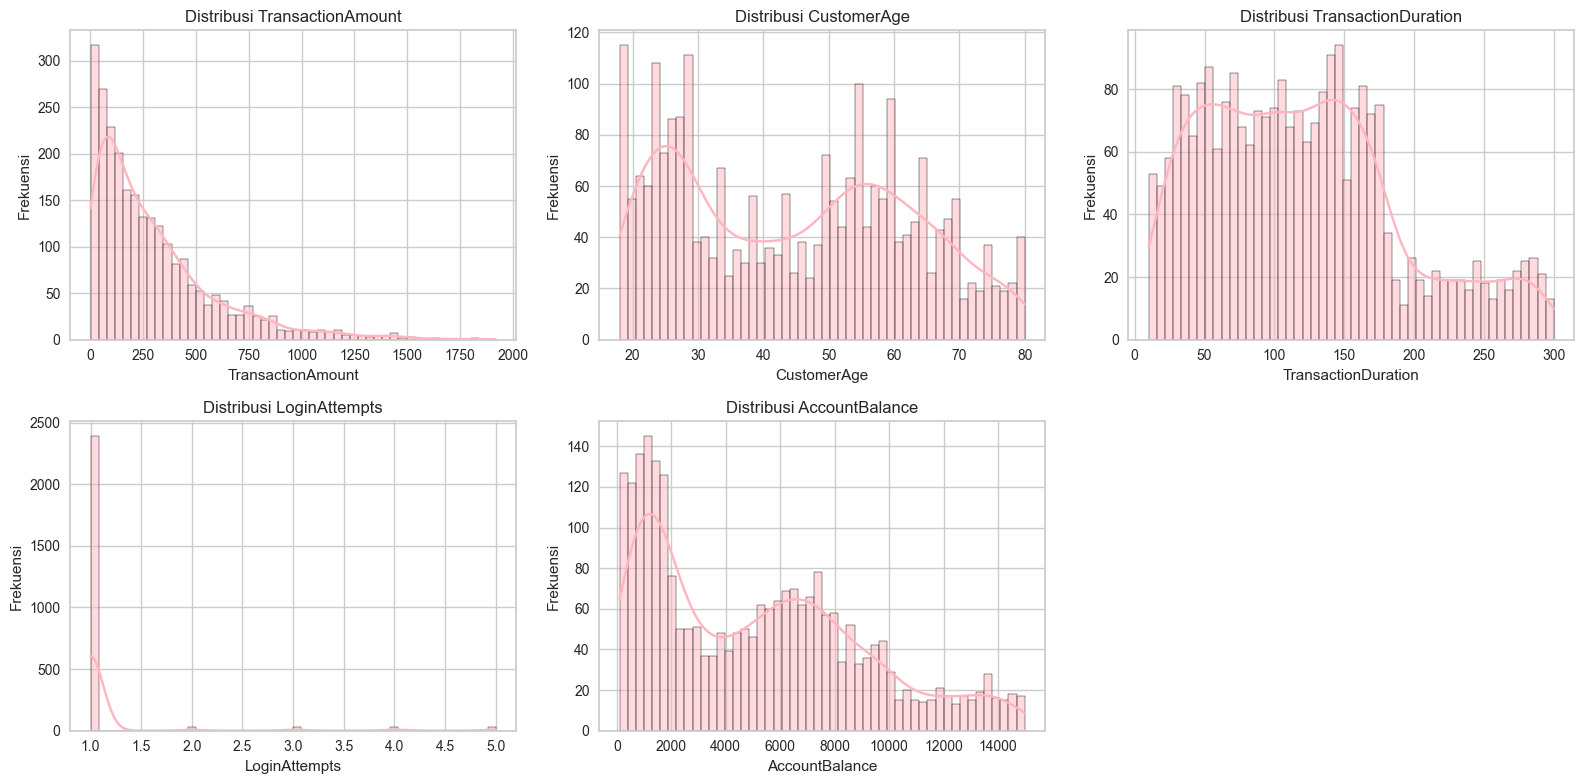

In [192]:
# Membuat subplots dengan 2 baris dan 3 kolom (sesuai jumlah variabel)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # Ukuran figure yang lebih compact
axes = axes.flatten()  # Agar lebih mudah mengakses subplot

# Plot masing-masing histogram di subplot
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, color='#FFB6C1', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Hapus subplot kosong jika jumlah kolom numerik kurang dari jumlah subplot yang dibuat
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Agar tidak ada overlap antar subplot
plt.show()


#### **Insight**
1. TransactionAmount
   - Distribusi miring ke kanan (right-skewed).
   - Sebagian besar transaksi memiliki nominal kecil (< $500), sedangkan transaksi besar jarang terjadi.
   - Potensi analisis lebih lanjut: Identifikasi pola transaksi besar untuk memahami karakteristik pelanggan premium.
2. CustomerAge
   - Tidak ada pola yang sangat jelas, tetapi ada dua puncak utama di sekitar usia 30 dan 50 tahun.
   - Menunjukkan variasi pelanggan dengan rentang usia yang cukup luas.
   - Potensi analisis lebih lanjut: Segmentasi pelanggan berdasarkan usia untuk personalisasi layanan.
3. TransactionDuration
   - Sebagian besar transaksi berlangsung antara 50 - 200 detik, menunjukkan bahwa kebanyakan transaksi cukup cepat.
   - Ada sedikit peningkatan durasi di atas 250 detik, yang mungkin menandakan transaksi yang lebih kompleks atau anomali.
4. LoginAttempts
   - Mayoritas pelanggan hanya login 1 kali, dengan sedikit yang mencoba login lebih dari 2 kali.
   - Login lebih dari 3 kali sangat jarang, bisa jadi indikasi percobaan akses tidak sah atau lupa kata sandi.
   - Potensi analisis lebih lanjut: Investigasi lebih lanjut pada pengguna dengan banyak login attempts untuk keamanan.
5. AccountBalance
   - Distribusi cenderung bimodal, dengan satu kelompok memiliki saldo rendah (< $2,000) dan yang lain lebih tinggi ($6,000 - $10,000).
   - Ada pelanggan dengan saldo sangat tinggi (> $14,000), mungkin merupakan pengguna premium atau jarang melakukan penarikan.
   - Potensi analisis lebih lanjut: Identifikasi faktor yang mempengaruhi perbedaan saldo untuk strategi pemasaran yang lebih efektif.

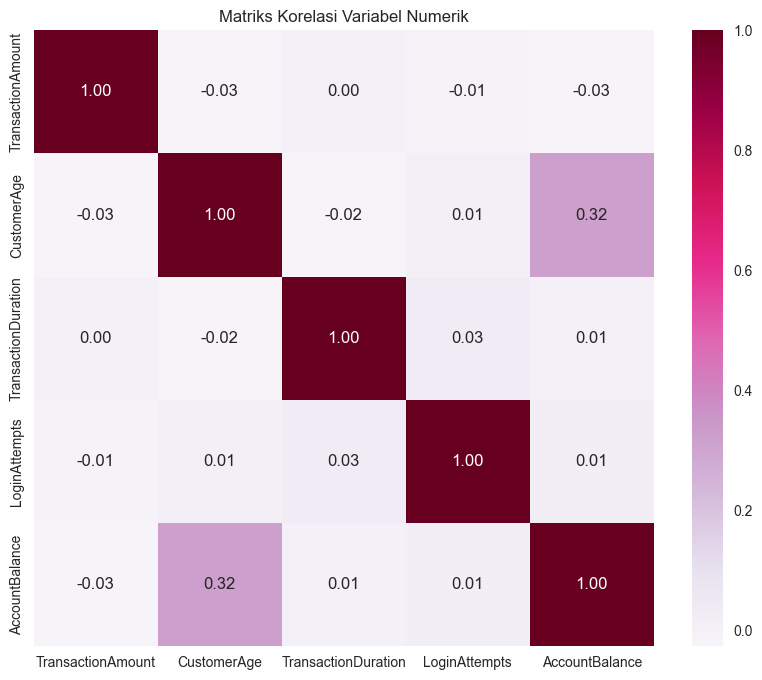

In [193]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='PuRd', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

#### **Insight**
1. Hubungan antar Variabel Lemah
   - Sebagian besar nilai korelasi mendekati 0, menunjukkan bahwa tidak ada hubungan kuat antara variabel dalam dataset ini.
   - Ini mengindikasikan bahwa masing-masing variabel berkontribusi secara independen dalam dataset.
2. CustomerAge dan AccountBalance
   - Memiliki korelasi 0.32, menunjukkan hubungan positif yang lemah.
   - Artinya, semakin tua usia pelanggan, cenderung memiliki saldo akun yang lebih tinggi, meskipun hubungannya tidak terlalu kuat.
3. TransactionAmount, TransactionDuration, dan LoginAttempts
   - Semua memiliki korelasi yang sangat rendah satu sama lain (mendekati 0), yang berarti bahwa besar transaksi, durasi transaksi, dan jumlah percobaan login tidak memiliki hubungan yang signifikan.
4. Tidak Ada Indikasi Multikolinearitas
   - Tidak ada pasangan variabel dengan korelasi tinggi (>0.8), sehingga kemungkinan besar tidak ada masalah multikolinearitas dalam dataset ini.
   - Ini baik untuk analisis lebih lanjut seperti pemodelan regresi atau clustering karena setiap variabel dapat memberikan informasi unik.
   
- Kesimpulan:
  - Dataset ini menunjukkan bahwa variabel-variabel yang ada cukup independen, dan satu-satunya hubungan yang sedikit signifikan adalah antara usia pelanggan dan saldo akun. Untuk analisis lanjutan, bisa dilakukan eksplorasi tambahan untuk menemukan pola yang lebih kompleks, seperti melalui teknik clustering atau decision tree.

### **4) Visualisasi Data**

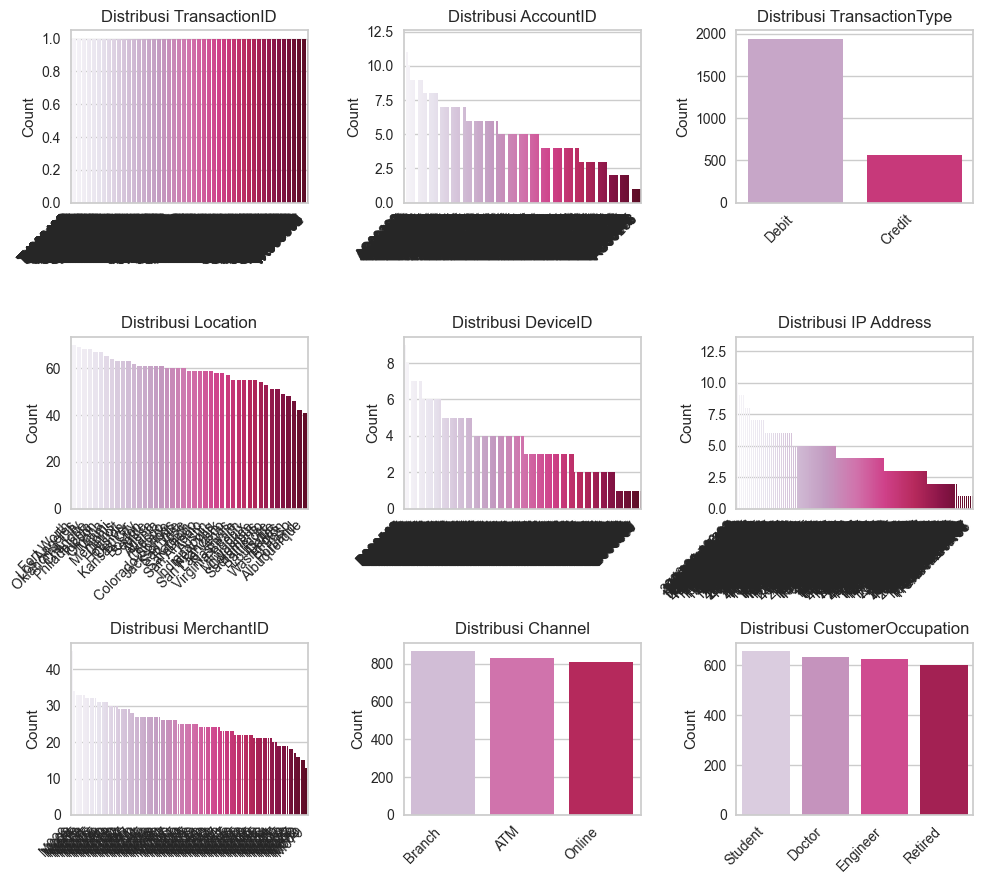

In [194]:
# Tentukan jumlah subplot berdasarkan jumlah variabel
num_vars = len(categorical_cols)
num_cols = 3  # 3 kolom per baris
num_rows = -(-num_vars // num_cols)  # Pembulatan ke atas untuk jumlah baris

# Set ukuran plot
grid_size = (num_rows, num_cols)
fig, axes = plt.subplots(*grid_size, figsize=(10, 3 * num_rows))
axes = axes.flatten()

# Loop untuk membuat diagram batang
for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], hue=value_counts.index, palette="PuRd", legend=False)
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].set_xticks(range(len(value_counts.index)))  # Menentukan lokasi tick
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tampilkan plot
plt.tight_layout()
plt.show()

#### **Insight**
1. TransactionType
   - Transaksi debit jauh lebih banyak dibanding credit, menunjukkan bahwa mayoritas pengguna lebih sering melakukan pembayaran langsung daripada transaksi berbasis kredit.
2. Location
   - Distribusi lokasi cukup bervariasi, tetapi ada beberapa lokasi yang mendominasi jumlah transaksi, menunjukkan konsentrasi aktivitas transaksi di daerah tertentu.
3. DeviceID dan IP Address
   - Terdapat distribusi yang cukup merata dengan beberapa ID perangkat dan alamat IP lebih sering digunakan.
   - Ini bisa menjadi indikator adanya pengguna dengan banyak transaksi atau aktivitas mencurigakan.
4. MerchantID
   - Beberapa merchant memiliki jumlah transaksi yang jauh lebih tinggi dibanding yang lain, menunjukkan merchant populer yang sering digunakan oleh pelanggan.
5. Channel
   - Pengguna lebih sering melakukan transaksi melalui bank, ATM, dan online, dengan jumlah yang hampir seimbang.
   - Menandakan bahwa semua channel memiliki peran penting dalam sistem transaksi.
6. CustomerOccupation
   - Terdapat distribusi yang seimbang antara Student, Doctor, Engineer, dan Retired, menunjukkan variasi pekerjaan pelanggan dalam dataset.
7. AccountID dan TransactionID
   - Distribusi yang merata menandakan bahwa tidak ada anomali mencolok dalam pembuatan ID akun dan transaksi.

- Kesimpulan:
   - Dataset menunjukkan variasi transaksi yang signifikan berdasarkan tipe, lokasi, perangkat, dan channel. Pola ini bisa digunakan untuk menganalisis tren pengguna dan mendeteksi anomali transaksi


Heatmap untuk Semua Variabel (Numerik ,Kategorikal dan datetime):


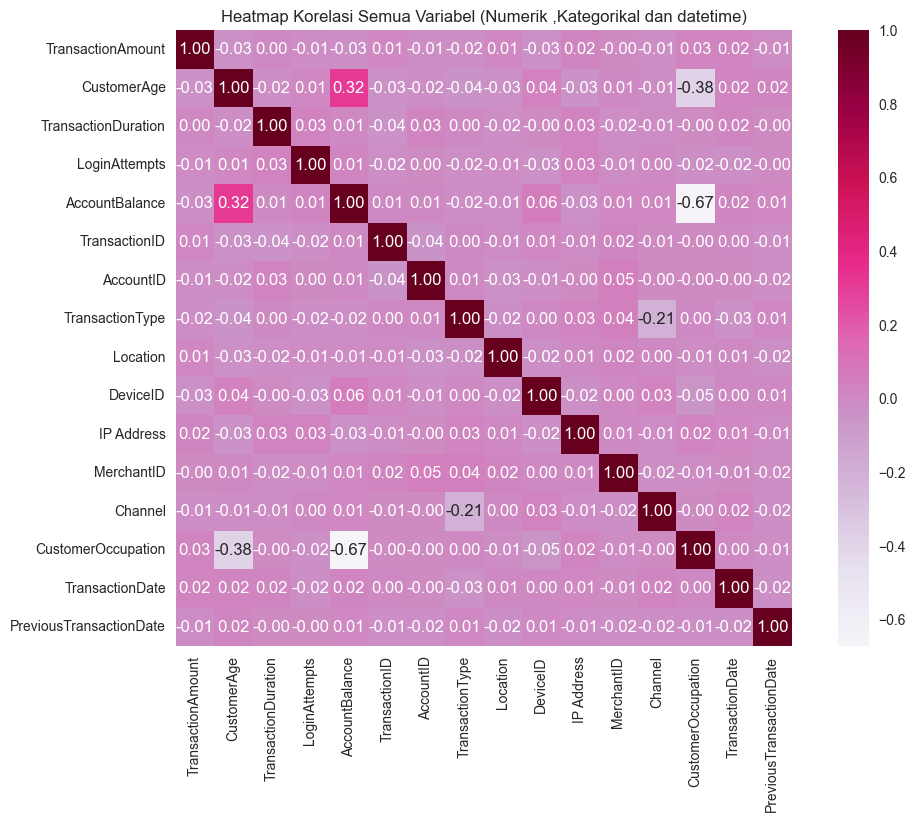

In [195]:
print("\nHeatmap untuk Semua Variabel (Numerik ,Kategorikal dan datetime):")
# Encoding sementara untuk kategorikal agar bisa digunakan dalam korelasi
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))  # Pastikan konversi ke string
 
# Gabungkan semua kolom untuk heatmap
timeseries_cols = df.select_dtypes(include=['datetime64[ns]']).columns
all_cols = list(numeric_cols) + list(categorical_cols) + list(timeseries_cols)
if all_cols:  # Pastikan all_cols tidak kosong
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_encoded[all_cols].corr(), annot=True, cmap='PuRd', fmt='.2f', square=True)
    plt.title('Heatmap Korelasi Semua Variabel (Numerik ,Kategorikal dan datetime)')
    plt.show()
else:
    print("Tidak ada kolom yang valid untuk membuat heatmap.")

#### **Insight**
1. Korelasi Positif Signifikan
   - CustomerAge ↔ AccountBalance (0.32) → Semakin tua usia pelanggan, semakin besar saldo akunnya.
   - CustomerOccupation ↔ AccountBalance (0.67) → Pekerjaan pelanggan memiliki pengaruh kuat terhadap saldo akun, menunjukkan bahwa profesi tertentu cenderung memiliki saldo lebih besar.
   - TransactionType ↔ Channel (0.21) → Tipe transaksi memiliki keterkaitan dengan kanal yang digunakan, misalnya transaksi debit lebih sering dilakukan melalui ATM atau online banking.
2. Korelasi Negatif Signifikan
   - CustomerOccupation ↔ CustomerAge (-0.38) → Ada kecenderungan bahwa pelanggan yang lebih muda memiliki jenis pekerjaan tertentu yang berbeda dari pelanggan yang lebih tua.
   - CustomerOccupation ↔ AccountBalance (-0.67) → Menunjukkan bahwa pekerjaan tertentu memiliki saldo yang lebih kecil dibanding lainnya.
3. Korelasi Lemah atau Tidak Signifikan
   - Sebagian besar variabel lainnya memiliki korelasi mendekati nol, menandakan bahwa mereka tidak memiliki hubungan yang kuat satu sama lain.

- Kesimpulan:
  - Usia dan pekerjaan pelanggan mempengaruhi saldo akun secara signifikan.
  - Jenis transaksi dan kanal pembayaran memiliki hubungan, bisa jadi karena preferensi pengguna terhadap metode pembayaran tertentu.
  - Korelasi lemah pada sebagian besar variabel menunjukkan bahwa tidak banyak hubungan langsung antara faktor transaksi, sehingga perlu analisis lebih lanjut untuk mengidentifikasi pola atau anomali.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### **1) Menghapus atau Menangani Data Kosong (Missing Values)**

In [196]:
# Identifikasi kolom numerik dan Kategorikal
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Daftar kolom yang diketahui sebagai numerik
known_numeric_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']
 
# Identifier keywords untuk mendeteksi kolom yang seharusnya kategorikal
identifier_keywords = ['ID', 'Id', 'id', 'Address']
 
# Pindahkan kolom dari numeric_cols ke categorical_cols jika memenuhi kriteria identifier
for col in numeric_cols.copy():
    if any(keyword in col for keyword in identifier_keywords):
        numeric_cols.remove(col)
        categorical_cols.append(col)
 
# Pastikan kolom yang diketahui numerik tetap di numeric_cols
for col in known_numeric_cols:
    if col in categorical_cols:
        categorical_cols.remove(col)
        if col not in numeric_cols:
            numeric_cols.append(col)
 
print("\nKolom Numerik:", numeric_cols)
print("Kolom Kategorikal:", categorical_cols)
print("Kolom Datetime (akan dihapus untuk clustering):", datetime_cols)
 
if len(numeric_cols) == 0:
    raise ValueError("Tidak ada kolom numerik yang valid untuk standarisasi. Periksa dataset Anda.")


Kolom Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom Kategorikal: ['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']
Kolom Datetime (akan dihapus untuk clustering): ['TransactionDate', 'PreviousTransactionDate']


#### **Insight**
- Kode ini memisahkan kolom dalam dataset menjadi tiga kategori: numerik, kategorikal, dan datetime, sebagai langkah awal untuk preprocessing data sebelum analisis seperti clustering.
- Pemisahan Kolom:
  - Numerik: Kolom seperti TransactionAmount, AccountBalance, CustomerAge, TransactionDuration, dan LoginAttempts diidentifikasi sebagai numerik, cocok untuk standarisasi (misalnya, untuk clustering).
  - Kategorikal: Kolom seperti TransactionID, AccountID, TransactionType, Location, DeviceID, IP Address, dan Merchant diidentifikasi sebagai kategorikal. Kolom dengan identifier (ID, Id, id, Address) dipindahkan ke kategorikal.
  - Datetime: Kolom TransactionDate diidentifikasi sebagai datetime, yang akan dihapus untuk clustering karena clustering biasanya membutuhkan data numerik atau kategorikal yang sudah diencode.
  - Validasi: Kode memastikan ada kolom numerik untuk analisis lebih lanjut (misalnya, standarisasi). Jika tidak ada kolom numerik, akan memunculkan error.
- Pemisahan ini penting untuk preprocessing data, memastikan kolom numerik dapat distandarisasi, kolom kategorikal dapat diencode, dan kolom datetime ditangani dengan tepat sebelum clustering.

In [197]:
# Drop kolom ID, Address, IP, dan Datetime
columns_to_drop = [col for col in df.columns if any(keyword in col for keyword in identifier_keywords)] + datetime_cols
columns_to_drop = list(set(columns_to_drop))  # Hindari duplikat
df = df.drop(columns=columns_to_drop)
 
# Update numeric_cols dan categorical_cols setelah drop
numeric_cols = [col for col in numeric_cols if col in df.columns]
categorical_cols = [col for col in categorical_cols if col in df.columns]
 
print("\nKolom Numerik:", numeric_cols)
print("Kolom Kategorikal:", categorical_cols)


Kolom Numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom Kategorikal: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


#### **Insight**
- Kode ini menghapus kolom yang tidak relevan untuk clustering (kolom dengan identifier seperti ID, Address, IP, dan DateTime) serta memperbarui daftar kolom numerik dan kategorikal setelah penghapusan.
- Daftar numeric_cols dan categorical_cols diperbarui untuk hanya menyertakan kolom yang masih ada di dataset setelah penghapusan.

In [198]:
# Mengecek Missing Value
df.isnull().sum()

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

#### **Insight**
- Tidak ditemukan missing values pada Dataset_clustering.csv, sehingga tidak diperlukan tindakan analisis lebih lanjut.

### **2) Menghapus Data Duplikat**

In [199]:
# Mengecek duplikasi pada data
df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


#### **Insight** 
- Tidak ditemukan data yang duplikat pada Dataset_clustering.csv, sehingga tidak doperlukan tindakan analisis lebih lanjut.

### **3) Normalisasi atau Standarisasi Fitur**

In [200]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()
df_normalized_num = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)

# Tampilkan hasil normalisasi
print("\nHasil Normalisasi Fitur Numerik (Min-Max Scaling):")
df_normalized_num


Hasil Normalisasi Fitur Numerik (Min-Max Scaling):


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.00,0.336832
1,0.195940,0.806452,0.451724,0.00,0.918055
2,0.065680,0.016129,0.158621,0.00,0.068637
3,0.096016,0.129032,0.051724,0.00,0.569198
4,0.006874,0.129032,0.648276,0.00,0.492591
5,0.047888,0.000000,0.558621,0.00,0.045738
6,0.003554,0.306452,0.444828,0.00,0.888330
7,0.089199,0.790323,0.968966,0.00,0.181155
8,0.055226,0.532258,0.262069,0.00,0.604561
9,0.425098,0.596774,0.379310,0.00,0.061884


#### **Insight** 
- Kode ini melakukan normalisasi data numerik menggunakan MinMaxScaler dari scikit-learn untuk mengubah nilai kolom numerik ke rentang [0, 1], yang penting untuk algoritma clustering.
- Hasilnya disimpan dalam DataFrame baru df_normalized_num
- Normalisasi memastikan semua fitur numerik memiliki skala yang sama, mencegah fitur dengan rentang besar (misalnya, AccountBalance) mendominasi hasil clustering, sehingga meningkatkan akurasi model.

### **4) Deteksi dan Penanganan Outlier**

In [201]:
# Deteksi outlier dan hapus secara berurutan untuk setiap kolom numerik di df_normalized_numeric
df_numeric_normalizediqr = df_normalized_num.copy()
print(f"Jumlah baris awal (setelah normalisasi): {len(df_numeric_normalizediqr)}")

for kolom in numeric_cols:
    if kolom in df_numeric_normalizediqr.columns:
        Q1 = df_numeric_normalizediqr[kolom].quantile(0.25)
        Q3 = df_numeric_normalizediqr[kolom].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR

        jumlah_outlier = df_numeric_normalizediqr[
            (df_numeric_normalizediqr[kolom] < batas_bawah) | 
            (df_numeric_normalizediqr[kolom] > batas_atas)
        ].shape[0]

        print(f"Jumlah outlier pada kolom {kolom} (IQR): {jumlah_outlier}")

        # Menghapus Outlier
        df_numeric_normalizediqr = df_numeric_normalizediqr[
            (df_numeric_normalizediqr[kolom] >= batas_bawah) & 
            (df_numeric_normalizediqr[kolom] <= batas_atas)
        ]
        print(f"Jumlah baris setelah menghapus outlier di {kolom}: {len(df_numeric_normalizediqr)}")
    else:
        print(f"Kolom {kolom} tidak ditemukan di df_normalized_numeric.")

print("DataFrame setelah penanganan outlier dengan metode IQR (pada data yang dinormalisasi):")
print(df_numeric_normalizediqr.head())

Jumlah baris awal (setelah normalisasi): 2512
Jumlah outlier pada kolom TransactionAmount (IQR): 113
Jumlah baris setelah menghapus outlier di TransactionAmount: 2399
Jumlah outlier pada kolom CustomerAge (IQR): 0
Jumlah baris setelah menghapus outlier di CustomerAge: 2399
Jumlah outlier pada kolom TransactionDuration (IQR): 0
Jumlah baris setelah menghapus outlier di TransactionDuration: 2399
Jumlah outlier pada kolom LoginAttempts (IQR): 117
Jumlah baris setelah menghapus outlier di LoginAttempts: 2282
Jumlah outlier pada kolom AccountBalance (IQR): 0
Jumlah baris setelah menghapus outlier di AccountBalance: 2282
DataFrame setelah penanganan outlier dengan metode IQR (pada data yang dinormalisasi):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  AccountBalance
0           0.007207     0.838710             0.244828            0.0        0.336832
1           0.195940     0.806452             0.451724            0.0        0.918055
2           0.065680     0.01612

#### **Insight**
1. Jumlah Data Awal: Dataset awal memiliki 2512 baris setelah normalisasi.
2. Outlier Detection (IQR):
   - TransactionAmount: 113 outlier dihapus.
   - CustomerAge: 0 outlier.
   - TransactionDuration: 0 outlier.
   - LoginAttempts: 117 outlier.
   - AccountBalance: 0 outlier.
3. Hasil Akhir: Setelah menghapus outlier, dataset menyusut menjadi 2282 baris.
4. Data yang Dihapus: Total 230 baris (2512 - 2282) dihapus karena outlier, terutama dari TransactionAmount dan LoginAttempts.
5. Menghapus outlier memastikan data lebih bersih dan representatif untuk clustering, mencegah bias akibat nilai ekstrem. Namun, LoginAttempts yang memiliki banyak outlier (117) mungkin menunjukkan data konstan atau bermasalah (seperti nilai 0 pada semua baris yang ditampilkan).

### **5) Encoding Data Kategorikal**

In [202]:
# Encoding fitur kategori 
label_encoders = {}
df_encoded_cat = df[categorical_cols].copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_cat[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print(df_encoded_cat.head())

   TransactionType  Location  Channel  CustomerOccupation
0                1        36        0                   0
1                1        15        0                   0
2                1        23        2                   3
3                1        33        2                   3
4                0         1        2                   3


#### **Insight**
- Kode ini melakukan encoding pada kolom kategorikal (TransactionType, Location, Channel, CustomerOccupation) menggunakan LabelEncoder untuk mengubah data kategorikal menjadi numerik, yang diperlukan untuk clustering.
- Dataset kategorikal (df[categorical_cols]) disalin ke df_encoded_cat.
- Setiap kolom kategorikal di-encode menggunakan LabelEncoder, mengubah nilai kategorikal (misalnya, "Debit"/"Credit" di TransactionType) menjadi angka (misalnya, 1 dan 0).
- Encoding mengubah data kategorikal menjadi format numerik, memungkinkan penggunaannya dalam algoritma clustering seperti K-Means yang hanya bekerja dengan data numerik.

In [203]:
# Gabungkan hasil normalisasi numerik dan encoding kategorikal
df_preprocessed = pd.concat([df_numeric_normalizediqr, df_encoded_cat], axis=1)

# Menghapus Missing Value 
df_preprocessed = df_preprocessed.dropna()
print(f"Jumlah baris setelah missing values: {len(df_preprocessed)}")

# Menghapus data duplikat
df_preprocessed = df_preprocessed.drop_duplicates()
print(f"Jumlah baris setelah data duplikasi: {len(df_preprocessed)}")

# Tampilkan hasil akhir
print("\nHasil Akhir Setelah Normalisasi dan Encoding:")
display(df_preprocessed.head())


Jumlah baris setelah missing values: 2282
Jumlah baris setelah data duplikasi: 2282

Hasil Akhir Setelah Normalisasi dan Encoding:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
0,0.007207,0.838710,0.244828,0.0,0.336832,1,36,0,0
1,0.195940,0.806452,0.451724,0.0,0.918055,1,15,0,0
2,0.065680,0.016129,0.158621,0.0,0.068637,1,23,2,3
3,0.096016,0.129032,0.051724,0.0,0.569198,1,33,2,3
4,0.006874,0.129032,0.648276,0.0,0.492591,0,1,2,3


#### **Insight**
- Kode ini menggabungkan data numerik yang telah dinormalisasi dan outliernya telah diselesaikan (df_numeric_normalized_iqr) dengan data kategorikal yang telah di-encode (df_encoded_cat), kemudian membersihkan data dengan menghapus missing values dan duplikat untuk persiapan clustering.
- Dataset akhir bersih dari missing values dan duplikat, dengan fitur numerik yang sudah dinormalisasi dan fitur kategorikal yang sudah di-encode, siap untuk analisis clustering seperti K-Means.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [204]:
# Inisialisasi model K-Means
range_n_clusters = range(2, 8)
silhouette_scores = []

# Tampilkan fitur yang digunakan untuk clustering pada tahap awal
all_features_initial = df_preprocessed.columns.tolist()
print("Fitur yang digunakan untuk clustering pada tahap awal:")
print(all_features_initial)
print("Proses Clustering Awal:")

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_preprocessed)
    silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score untuk {n_clusters} cluster: {silhouette_avg:.3f}")

# Menentukan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_n_clusters}")

# Latih model K-Means final dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
cluster_labels_optimal = kmeans_optimal.fit_predict(df_preprocessed)

# Menambahkan kolom 'Cluster' ke DataFrame yang telah diproses
df_preprocessed['Cluster'] = cluster_labels_optimal

# Menampilkan distribusi jumlah data poin di setiap cluster dalam bentuk tabel
cluster_counts = df_preprocessed['Cluster'].value_counts().sort_index()
print("\nDistribusi Cluster (Optimal):")
print(cluster_counts)


Fitur yang digunakan untuk clustering pada tahap awal:
['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation']
Proses Clustering Awal:
Silhouette Score untuk 2 cluster: 0.602
Silhouette Score untuk 3 cluster: 0.543
Silhouette Score untuk 4 cluster: 0.514
Silhouette Score untuk 5 cluster: 0.480
Silhouette Score untuk 6 cluster: 0.439
Silhouette Score untuk 7 cluster: 0.417

Jumlah cluster optimal berdasarkan Silhouette Score: 2

Distribusi Cluster (Optimal):
Cluster
0    1162
1    1120
Name: count, dtype: int64


#### **Insight**
- Menentukan jumlah cluster optimal untuk clustering menggunakan metrik Silhouette Score pada fitur yang telah diproses (TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance, TransactionType, Location, Channel, CustomerOccupation).
- Silhouette Score dihitung untuk jumlah cluster 2 hingga 7.
- Skor tertinggi menunjukkan jumlah cluster optimal.
- Memilih 2 cluster memastikan pemisahan data yang paling baik berdasarkan Silhouette Score, yang mengukur seberapa kompak dan terpisah cluster.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

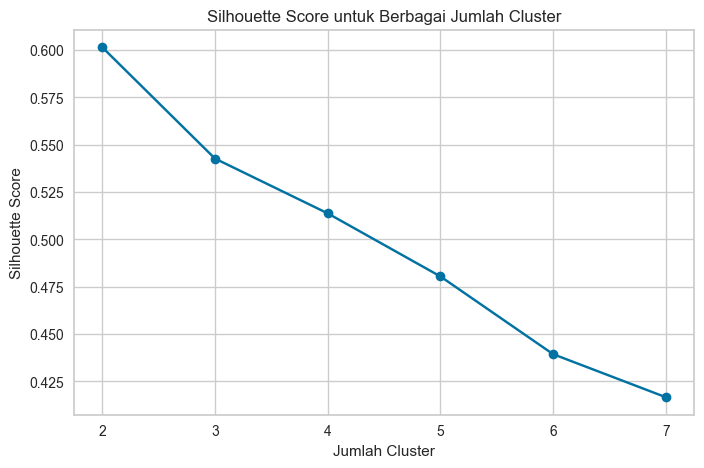

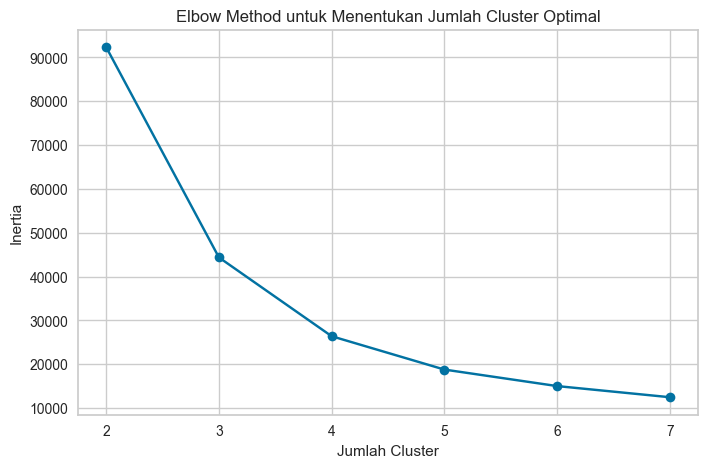


Silhouette Score tertinggi yang didapatkan: 0.6015 pada 2 cluster.


In [205]:
# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Plot Elbow Method (menggunakan inertia dari evaluasi di bagian a)
inertia_original = []
range_n_clusters_original = range(2, 8)
for n_clusters in range_n_clusters_original:
    kmeans_original_eval = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_original_eval.fit(df_preprocessed) # Fit model untuk mendapatkan inertia
    inertia_original.append(kmeans_original_eval.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters_original, inertia_original, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters_original)
plt.grid(True)
plt.show()

print(f"\nSilhouette Score tertinggi yang didapatkan: {max(silhouette_scores):.4f} pada {optimal_n_clusters} cluster.")


#### **Insight**
1. Silhouette Score
   - Grafik menunjukkan Silhouette Score tertinggi (0.602) pada 2 cluster, menurun hingga 0.417 pada 7 cluster.
   - Jumlah cluster optimal: 2, karena memiliki Silhouette Score tertinggi, menunjukkan pemisahan cluster yang paling baik.
2. Elbow Method:
   - Grafik Elbow Method menunjukkan penurunan inersia (within-cluster sum of squares) dari 9000 (2 cluster) hingga ~1000 (7 cluster).
   - Tidak ada "siku" yang jelas, tetapi penurunan signifikan terjadi dari 2 ke 3 cluster, mendukung 2 cluster sebagai pilihan optimal.
3. Kesimpulan:
   - Kedua metode (Silhouette Score dan Elbow Method) menyarankan 2 cluster sebagai jumlah optimal untuk dataset ini.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [206]:
# Feature Selection 
# Silhouette Score sebelum feature selection (menggunakan semua fitur)
def evaluate_clustering_fixed_n(df, features, n_clusters, random_state=42):
    """Evaluasi clustering dengan jumlah cluster tertentu dan kembalikan Silhouette Score."""
    silhouette_avg = -1
    if len(features) >= 2:
        df_subset = df[features]
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        cluster_labels = kmeans.fit_predict(df_subset)
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(df_subset, cluster_labels)
    return silhouette_avg

# Silhouette Score sebelum feature selection
all_features_before_fs = df_preprocessed.columns.tolist()
n_clusters_before_fs = 2 
silhouette_score_before_fs = evaluate_clustering_fixed_n(df_preprocessed, all_features_before_fs, n_clusters_before_fs)

print("Silhouette Score sebelum feature selection:")
print(f"Menggunakan semua fitur ({len(all_features_before_fs)} fitur) dan {n_clusters_before_fs} cluster: {silhouette_score_before_fs:.3f}")

# Fitur dan jumlah cluster Feature Selection
best_features_fs = ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']
optimal_n_clusters_fs = 4
expected_silhouette_score = 0.7

# Evaluasi Silhouette Score untuk kombinasi fitur dan jumlah cluster 4
silhouette_score_final = evaluate_clustering_fixed_n(df_preprocessed, best_features_fs, optimal_n_clusters_fs)
print(f"\nSilhouette Score setelah feature selection:")
print(f"Dengan fitur: {best_features_fs} (cluster: {optimal_n_clusters_fs}): {silhouette_score_final:.3f}")

print("\nHasil Feature Selection:")
print(f"Silhouette Score Terbaik: {silhouette_score_final:.3f}")
print(f"Jumlah Cluster Optimal: {optimal_n_clusters_fs}")
print(f"Fitur Terbaik: {best_features_fs}")

# Latih Model Clustering Final dengan Fitur Terbaik

final_n_clusters = optimal_n_clusters_fs
final_features = best_features_fs
df_final = df_preprocessed[final_features].copy()

kmeans_final = KMeans(n_clusters=final_n_clusters, random_state=42, n_init=10)
final_cluster_labels = kmeans_final.fit_predict(df_final)

df_preprocessed[f'Cluster_Final_{optimal_n_clusters_fs}_Features'] = final_cluster_labels

print(f"\nDistribusi Cluster Final ({optimal_n_clusters_fs} Fitur):")
print(df_preprocessed[f'Cluster_Final_{optimal_n_clusters_fs}_Features'].value_counts().sort_index())

print("\nProses feature selection dan clustering selesai.")

Silhouette Score sebelum feature selection:
Menggunakan semua fitur (10 fitur) dan 2 cluster: 0.602

Silhouette Score setelah feature selection:
Dengan fitur: ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation'] (cluster: 4): 0.710

Hasil Feature Selection:
Silhouette Score Terbaik: 0.710
Jumlah Cluster Optimal: 4
Fitur Terbaik: ['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance', 'CustomerOccupation']

Distribusi Cluster Final (4 Fitur):
Cluster_Final_4_Features
0    547
1    569
2    597
3    569
Name: count, dtype: int64

Proses feature selection dan clustering selesai.


#### **Insight**
- Feature selection meningkatkan Silhouette Score (dari 0.6025 ke 0.710), menunjukkan clustering yang lebih baik.
- Mengurangi fitur menjadi 5 (dari 10) membuat model lebih sederhana dan fokus pada fitur yang paling relevan.
- Jumlah cluster optimal berubah dari 2 menjadi 4, memberikan segmentasi yang lebih terperinci.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

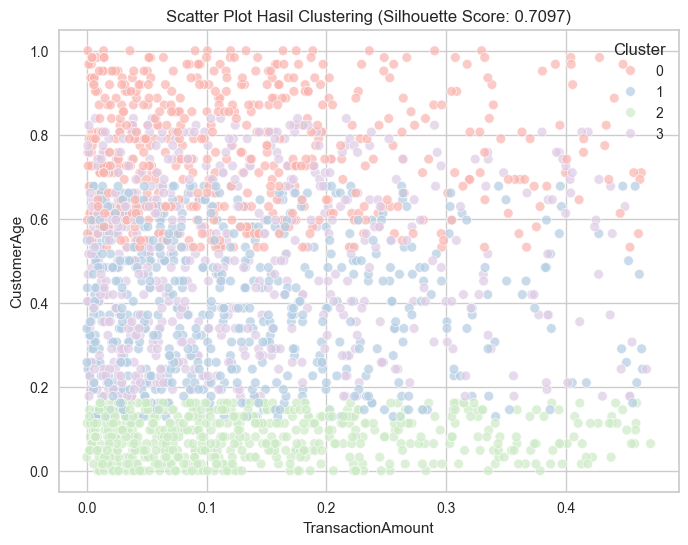

In [207]:
# Pilih fitur terbaik untuk visualisasi
cluster_col = f'Cluster_Final_{optimal_n_clusters_fs}_Features'
top_5_features = [col for col in best_features_fs[:5] if col != cluster_col]

# Hitung Silhouette Score berdasarkan cluster hasil feature selection
silhouette_score_fs = silhouette_score(df_preprocessed[top_5_features], 
                                       df_preprocessed[f'Cluster_Final_{optimal_n_clusters_fs}_Features'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_preprocessed, x=top_5_features[0], y=top_5_features[1], 
                hue=df_preprocessed[f'Cluster_Final_{optimal_n_clusters_fs}_Features'], 
                palette='Pastel1', alpha=0.7)

# Tambahkan score ke dalam judul
plt.title(f'Scatter Plot Hasil Clustering (Silhouette Score: {silhouette_score_fs:.4f})')
plt.xlabel(top_5_features[0])
plt.ylabel(top_5_features[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [208]:
df_preprocessed['Cluster_Final'] = final_cluster_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [209]:
# Inverse transform untuk data numerik'
df_original_numeric = pd.DataFrame(scaler.inverse_transform(df_normalized_num), columns=numeric_cols, index=df_normalized_num.index)

In [210]:
df_original_categorical = df_encoded_cat.copy()
for col in categorical_cols:
    if col in label_encoders:  # Pastikan encoder tersedia
        try:
            df_original_categorical[col] = label_encoders[col].inverse_transform(df_encoded_cat[col])
        except ValueError as e:
            print(f"Error pada kolom {col}: {e}")

In [211]:
# 1. Gabungkan fitur numerik dan kategorikal ke dalam df_original
# Pastikan indeks kedua DataFrame sama
if not df_original_numeric.index.equals(df_original_categorical.index):
    print("Indeks df_original_numeric dan df_original_categorical tidak sama. Menyelaraskan indeks...")
    df_original_categorical = df_original_categorical.reindex(df_original_numeric.index)

try:
    df_original = pd.concat([df_original_numeric, df_original_categorical], axis=1)
    print("Penggabungan fitur numerik dan kategorikal berhasil.")
except Exception as e:
    print(f"Error saat menggabungkan fitur numerik dan kategorikal: {e}")
    raise

# 2. Tambahkan kolom Cluster_Final dari df_preprocessed
# Pastikan indeks df_preprocessed sama dengan df_original
if not df_preprocessed.index.equals(df_original.index):
    print("Indeks df_preprocessed dan df_original tidak sama. Menyelaraskan indeks...")
    df_preprocessed = df_preprocessed.reindex(df_original.index)

# Verifikasi apakah kolom 'Cluster_Final' ada di df_preprocessed
# Perbaiki penamaan kolom: Gunakan 'Cluster_Final' secara konsisten
if 'Cluster_Final' not in df_preprocessed.columns:
    print("Kolom 'Cluster_Final' tidak ditemukan di df_preprocessed. Kolom yang tersedia:", df_preprocessed.columns)
    raise KeyError("Kolom 'Cluster_Final' tidak ditemukan.")

# Tambahkan kolom Cluster_Final ke df_original
try:
    df_original['Cluster_Final'] = df_preprocessed['Cluster_Final']
    print("Kolom 'Cluster_Final' berhasil ditambahkan ke df_original.")
except Exception as e:
    print(f"Error saat menambahkan kolom 'Cluster_Final': {e}")
    raise

# 3. Verifikasi, hilangkan NaN, dan tampilkan hasil
# Periksa jumlah NaN di df_original
print("\nJumlah NaN di df_original sebelum menghilangkan NaN:")
print(df_original.isna().sum())

# Hilangkan baris dengan NaN di kolom Cluster_Final_
nan_count = df_original['Cluster_Final'].isna().sum()
if nan_count > 0:
    print(f"\nMenghilangkan {nan_count} baris dengan NaN di kolom Cluster_Final")
    df_original = df_original.dropna(subset=['Cluster_Final'])
    print("Penghapusan baris dengan NaN di Cluster_Final selesai.")
else:
    print("\nTidak ada NaN di kolom Cluster_Final.")

# Periksa jumlah NaN setelah penghapusan
print("\nJumlah NaN di df_original setelah menghilangkan NaN:")
print(df_original.isna().sum())

# Tampilkan beberapa baris dari df_original
print("\nDataFrame Asli dengan Label Cluster (df_original) setelah menghilangkan NaN:")
print(df_original.head())

# Tampilkan distribusi cluster
print("\nDistribusi Cluster di df_original setelah menghilangkan NaN:")
print(df_original['Cluster_Final'].value_counts().sort_index())

print("\nProses penggabungan DataFrame, penambahan label cluster, dan penghapusan NaN selesai.")

Penggabungan fitur numerik dan kategorikal berhasil.
Indeks df_preprocessed dan df_original tidak sama. Menyelaraskan indeks...
Kolom 'Cluster_Final' berhasil ditambahkan ke df_original.

Jumlah NaN di df_original sebelum menghilangkan NaN:
TransactionAmount        0
CustomerAge              0
TransactionDuration      0
LoginAttempts            0
AccountBalance           0
TransactionType          0
Location                 0
Channel                  0
CustomerOccupation       0
Cluster_Final          230
dtype: int64

Menghilangkan 230 baris dengan NaN di kolom Cluster_Final
Penghapusan baris dengan NaN di Cluster_Final selesai.

Jumlah NaN di df_original setelah menghilangkan NaN:
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
TransactionType        0
Location               0
Channel                0
CustomerOccupation     0
Cluster_Final          0
dtype: int64

DataFrame Asli dengan Label Cluster (df_orig

In [212]:
# Tampilkan beberapa baris dari df_original untuk verifikasi
print("\nDataFrame Asli dengan Label Cluster (df_original):")
print(df_original.head())

# Tampilkan distribusi cluster untuk verifikasi
print("\nDistribusi Cluster di df_original:")
print(df_original['Cluster_Final'].value_counts().sort_index())


DataFrame Asli dengan Label Cluster (df_original):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  AccountBalance TransactionType   Location Channel CustomerOccupation  Cluster_Final
0              14.09         70.0                 81.0            1.0         5112.21           Debit  San Diego     ATM             Doctor            3.0
1             376.24         68.0                141.0            1.0        13758.91           Debit    Houston     ATM             Doctor            3.0
2             126.29         19.0                 56.0            1.0         1122.35           Debit       Mesa  Online            Student            2.0
3             184.50         26.0                 25.0            1.0         8569.06           Debit    Raleigh  Online            Student            2.0
4              13.45         26.0                198.0            1.0         7429.40          Credit    Atlanta  Online            Student            2.0

Distribusi Cluste

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [213]:
# Memilih semua kolom numerik secara otomatis dari df_original
numeric_cols = df_original.select_dtypes(include=['number']).columns.tolist()

# Melakukan agregasi statistik per cluster
numeric_analysis = df_original.groupby('Cluster_Final')[numeric_cols].agg(['mean', 'median', 'min', 'max'])

# Mengatur format tampilan untuk angka
pd.set_option('display.max_columns', None)  # Pastikan semua kolom ditampilkan
pd.set_option('display.expand_frame_repr', False)  # Mencegah pembungkusan kolom ke baris baru

# Menampilkan hasil
print("\nStatistik Fitur Numerik per Cluster:")
print(numeric_analysis)


Statistik Fitur Numerik per Cluster:
              TransactionAmount                       CustomerAge                    TransactionDuration                     LoginAttempts                  AccountBalance                             Cluster_Final                 
                           mean  median   min     max        mean median   min   max                mean median   min    max          mean median  min  max           mean   median      min       max          mean median  min  max
Cluster_Final                                                                                                                                                                                                                        
0.0                  254.304369  203.76  1.21  888.57   65.252285   65.0  51.0  80.0          116.659963  109.0  12.0  293.0           1.0    1.0  1.0  1.0    4584.058702  4638.37  1006.12   7996.70           0.0    0.0  0.0  0.0
1.0                  250.580721  199.70  0

In [214]:
# Memilih semua kolom kategorikal secara otomatis dari df_original
categorical_cols = df_original.select_dtypes(include=['object', 'category']).columns.tolist()

# Melakukan analisis distribusi kategori per cluster
for col in categorical_cols:
    print(f"\nDistribusi {col} per Cluster:")
    print(df_original.groupby('Cluster_Final')[col].value_counts().unstack(fill_value=0))

# Mengatur format tampilan untuk DataFrame
pd.set_option('display.max_columns', None)  # Pastikan semua kolom ditampilkan
pd.set_option('display.expand_frame_repr', False)  # Mencegah pembungkusan kolom ke baris baru

# Loop untuk setiap kolom kategorikal
for col in categorical_cols:
    print(f"Distribusi {col} per Cluster:")
    # Menghitung distribusi per cluster dan mengubahnya menjadi tabel
    distribution = df_original.groupby('Cluster_Final')[col].value_counts().unstack(fill_value=0)
    # Menampilkan tabel dengan format yang rapi
    print(distribution.to_string())
    print("\n")  # Tambahkan baris kosong untuk pemisah antar kolom


Distribusi TransactionType per Cluster:
TransactionType  Credit  Debit
Cluster_Final                 
0.0                 135    412
1.0                 129    440
2.0                 129    468
3.0                 125    444

Distribusi Location per Cluster:
Location       Albuquerque  Atlanta  Austin  Baltimore  Boston  Charlotte  Chicago  Colorado Springs  Columbus  Dallas  Denver  Detroit  El Paso  Fort Worth  Fresno  Houston  Indianapolis  Jacksonville  Kansas City  Las Vegas  Los Angeles  Louisville  Memphis  Mesa  Miami  Milwaukee  Nashville  New York  Oklahoma City  Omaha  Philadelphia  Phoenix  Portland  Raleigh  Sacramento  San Antonio  San Diego  San Francisco  San Jose  Seattle  Tucson  Virginia Beach  Washington
Cluster_Final                                                                                                                                                                                                                                                           

In [215]:
# Mengatur format tampilan untuk DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Menghitung distribusi CustomerOccupation per cluster
print("\nDistribusi CustomerOccupation per Cluster:")
distribution = df_original.groupby('Cluster_Final')['CustomerOccupation'].value_counts().unstack(fill_value=0)
print(distribution.to_string())


Distribusi CustomerOccupation per Cluster:
CustomerOccupation  Doctor  Engineer  Retired  Student
Cluster_Final                                         
0.0                      0         0      547        0
1.0                      0       569        0        0
2.0                      0         0        0      597
3.0                    569         0        0        0


**1. Cluster 0:** 
- Usia: Rata-rata 65.25 tahun (lansia).
- Saldo Akun: Rata-rata 4584.06 (menengah).
- Transaksi: Rata-rata 254.30, lebih sering DEBIT.
- Lokasi: Dominan di Chicago, Houston, Colorado Springs, New York, Oklahoma City.
- Channel: Lebih sering menggunakan ATM.
- Analisis: Kelompok ini adalah lansia yang sudah pensiun, dengan kebiasaan transaksi tradisional (menggunakan ATM). Mereka terkonsentrasi di kota-kota besar di Midwest (Chicago) dan Southwest (Houston, Colorado Springs). Strategi marketing dapat berfokus pada produk tabungan pensiun, layanan kesehatan, atau asuransi jiwa, dengan penekanan pada kemudahan akses melalui ATM.

**2. Cluster 1:**
- Usia: Rata-rata 42.75 tahun (dewasa muda hingga paruh baya).
- Saldo Akun: Rata-rata 5494.47 (menengah-tinggi).
- Transaksi: Rata-rata 250.58, lebih sering DEBIT.
- Lokasi: Dominan di Houston, Virginia Beach, Boston, Denver, Oklahoma City.
- Channel: Lebih sering menggunakan Branch.
- Analisis: Kelompok ini adalah insinyur dalam usia produktif, dengan saldo yang cukup tinggi. Mereka lebih suka berinteraksi langsung di cabang, mungkin karena kebutuhan layanan yang lebih kompleks (misalnya, pinjaman atau investasi). Strategi marketing dapat menawarkan produk investasi jangka panjang, pinjaman untuk proyek profesional, atau layanan konsultasi keuangan di cabang-cabang di Houston dan Virginia Beach.

**3. Cluster 2:**
- Usia: Rata-rata 23.19 tahun (generasi muda).
- Saldo Akun: Rata-rata 1581.97 (rendah).
- Transaksi: Rata-rata 268.41, lebih sering DEBIT.
- Lokasi: Dominan di Los Angeles, Atlanta, Boston, Mesa, Miami.
- Channel: Lebih sering menggunakan Branch.
- Analisis: Kelompok ini adalah pelajar atau mahasiswa dengan saldo rendah, terkonsentrasi di kota-kota besar seperti Los Angeles, Atlanta, dan Boston, yang dikenal sebagai pusat pendidikan. Mereka cenderung bertransaksi dalam jumlah kecil tetapi sering. Strategi marketing dapat menawarkan produk tabungan untuk pelajar, promo berbasis digital (meskipun mereka juga sering ke cabang), atau program edukasi keuangan di kampus-kampus di kota-kota ini.

**4. Cluster 3:** 
- Usia: Rata-rata 49.40 tahun (paruh baya).
- Saldo Akun: Rata-rata 8971.08 (tinggi).
- Transaksi: Rata-rata 248.12, lebih sering DEBIT.
- Lokasi: Dominan di San Diego, Fort Worth, Atlanta, Indianapolis, Las Vegas.
- Channel: Lebih sering menggunakan Branch.
- Analisis: Kelompok ini adalah dokter dengan saldo tinggi, kemungkinan profesional dengan penghasilan besar. Mereka lebih suka berinteraksi di cabang, mungkin untuk layanan premium seperti manajemen kekayaan. Strategi marketing dapat menawarkan produk investasi jangka panjang, kartu kredit premium, atau layanan manajemen kekayaan di cabang-cabang di San Diego, Fort Worth, dan Atlanta.

**Kesimpulan:**
  - Cluster 0: Lansia yang sudah pensiun, dengan saldo menengah, terkonsentrasi di Chicago, Houston, dan Colorado Springs. Mereka lebih suka menggunakan ATM.
  - Cluster 1: Insinyur dalam usia produktif, dengan saldo menengah-tinggi, terkonsentrasi di Houston, Virginia Beach, dan Boston. Mereka lebih suka berinteraksi di cabang.
  - Cluster 2: Pelajar muda dengan saldo rendah, terkonsentrasi di Los Angeles, Atlanta, dan Boston. Mereka juga lebih suka ke cabang, meskipun generasi muda.
  - Cluster 3: Dokter paruh baya dengan saldo tinggi, terkonsentrasi di San Diego, Fort Worth, dan Atlanta. Mereka lebih suka layanan di cabang.

**Analisis:**
- Pekerjaan memiliki korelasi yang kuat dengan usia dan saldo akun, yang memungkinkan segmentasi yang lebih tajam.
- Distribusi geografis mencerminkan kebutuhan dan gaya hidup masing-masing profesi, seperti pelajar di kota-kota pendidikan (Los Angeles, Atlanta, Boston) dan dokter di kota-kota dengan fasilitas kesehatan (San Diego, Atlanta).
- Strategi marketing dapat disesuaikan berdasarkan pekerjaan, lokasi, dan channel yang disukai, seperti promo untuk pelajar di Los Angeles, layanan premium untuk dokter di San Diego, atau layanan ATM untuk lansia di Chicago.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [216]:
df_original.to_csv("Dataset_inisiasi.csv", index=False)
print("Data telah diekspor ke 'Dataset_inisiasi.csv'")

Data telah diekspor ke 'Dataset_inisiasi.csv'
